In [10]:
import numpy as np

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

from sktime.forecasting.theta import ThetaForecaster

# data

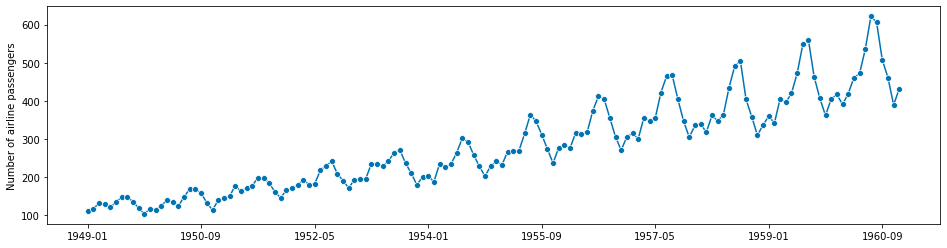

In [6]:
y = load_airline()
fig, ax = plot_series(y)

# model

In [7]:
# forecasting horizon
fh = np.arange(1, 13)

# model
forecaster = ThetaForecaster(sp = 12)

# model fit
forecaster.fit(y, fh = fh)

ThetaForecaster(sp=12)

## interval predictions

In [8]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage = coverage)
y_pred_ints

Coverage            
                0.9            
              lower       upper
1961-01  418.280121  464.281951
1961-02  402.215881  456.888055
1961-03  459.966113  522.110500
1961-04  442.589309  511.399214
1961-05  443.525027  518.409480
1961-06  506.585814  587.087737
1961-07  561.496768  647.248956
1961-08  557.363322  648.062363
1961-09  477.658056  573.047752
1961-10  407.915090  507.775355
1961-11  346.942924  451.082016
1961-12  394.708221  502.957142

In [13]:
y_pred = forecaster.predict()
y_pred

1961-01    441.281036
1961-02    429.551968
1961-03    491.038306
1961-04    476.994261
1961-05    480.967253
1961-06    546.836776
1961-07    604.372862
1961-08    602.712843
1961-09    525.352904
1961-10    457.845222
1961-11    399.012470
1961-12    448.832681
Freq: M, Name: Number of airline passengers, dtype: float64

In [19]:
from sktime.utils import plotting
fig, ax = plotting.plot_series(y, y_pred, labels=["y", "y_pred"], pred_interval=y_pred_ints)

TypeError: plot_series() got an unexpected keyword argument 'pred_interval'

## quantile forecast

In [20]:
y_pred_quantiles = forecaster.predict_quantiles(alpha = [0.275, 0.975])
y_pred_quantiles

Quantiles            
              0.275       0.975
1961-01  432.922219  468.688317
1961-02  419.617696  462.124925
1961-03  479.746287  528.063109
1961-04  464.491077  517.990291
1961-05  467.360286  525.582418
1961-06  532.209079  594.798754
1961-07  588.791160  655.462879
1961-08  586.232267  656.750129
1961-09  508.020007  582.184821
1961-10  439.699996  517.340645
1961-11  380.089754  461.057161
1961-12  429.163184  513.325954

## variance predictions

In [21]:
y_pred_var = forecaster.predict_var()
y_pred_var

,0
1961-01,195.540049
1961-02,276.196509
1961-03,356.852968
1961-04,437.509428
1961-05,518.165887
1961-06,598.822347
1961-07,679.478807
1961-08,760.135266
1961-09,840.791726
1961-10,921.448185


## distribution predictions

In [22]:
y_pred_proba = forecaster.predict_proba()
y_pred_proba

2023-03-11 20:15:45.924599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 20:15:51.944924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tfp.distributions.Normal 'Normal' batch_shape=[12, 1] event_shape=[] dtype=float32>